<a href="https://colab.research.google.com/github/TCassano/AIEngineeringMaster/blob/main/MLModels/progetto_corso_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Mi costruisco delle funzioni helper

In [2]:
def evaluate_classification_model(model, X_test, y_test, show_confusion_matrix=False):
    """
    Evaluate a classification model and print relevant metrics. For a classification model, we typically look at accuracy, recall, precision, and F1-score. We usually do not use RMSE or R² for classification tasks. We build a confusion matrix to visualize performance.
    """
    # Predictions
    y_pred = model.predict(X_test)
    # Confusion Matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.show()
    # computing report
    print(classification_report(y_test, y_pred))
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy

In [3]:
df = pd.read_csv('fruits.csv')
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [4]:
for col in df.columns:
  print(f" Per la colonna {col} ci sono {df[col].isna().sum()} valori NaN")

 Per la colonna Frutto ci sono 0 valori NaN
 Per la colonna Peso (g) ci sono 0 valori NaN
 Per la colonna Diametro medio (mm) ci sono 0 valori NaN
 Per la colonna Lunghezza media (mm) ci sono 0 valori NaN
 Per la colonna Durezza buccia (1-10) ci sono 0 valori NaN
 Per la colonna Dolcezza (1-10) ci sono 0 valori NaN


In [5]:
print("Tipi di dato per ogni colonna:")
print(df.dtypes)

Tipi di dato per ogni colonna:
Frutto                    object
Peso (g)                 float64
Diametro medio (mm)      float64
Lunghezza media (mm)     float64
Durezza buccia (1-10)    float64
Dolcezza (1-10)          float64
dtype: object


In [6]:
X = df.drop(["Frutto"], axis=1)
y = df["Frutto"]
# vedo che categorie ci sono
print(y.value_counts())

Frutto
Mela       100
Banana     100
Arancia    100
Uva        100
Kiwi       100
Name: count, dtype: int64


In [7]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

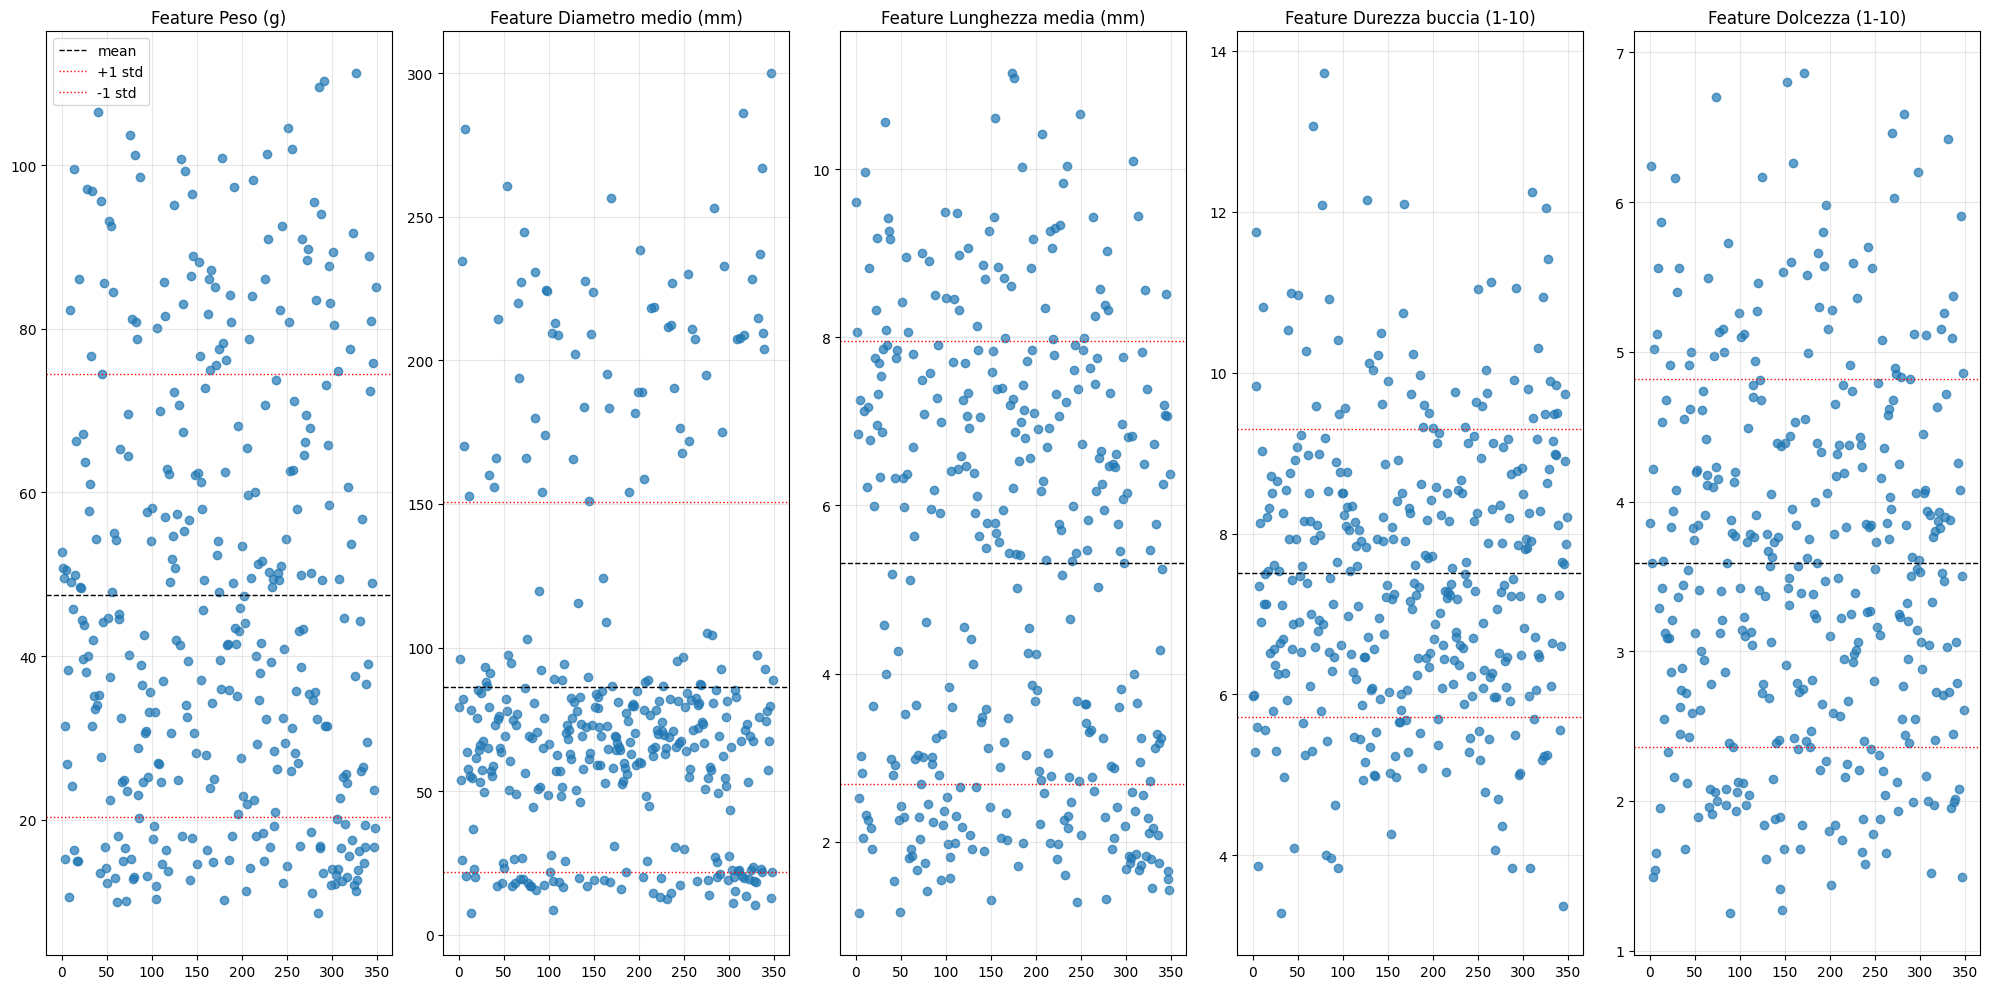

In [8]:
n_features = 5
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes = axes.ravel()

feature_names = X_train.columns

for i, feature_name in enumerate(feature_names):
    data = X_train[feature_name]
    ax = axes[i]
    ax.scatter(np.arange(len(data)), data, alpha=0.7)

    mean = np.mean(data)
    std = np.std(data)

    ax.axhline(mean, color="black", linestyle="--", linewidth=1, label="mean")
    ax.axhline(mean + std, color="red", linestyle=":", linewidth=1, label="+1 std")
    ax.axhline(mean - std, color="red", linestyle=":", linewidth=1, label="-1 std")

    ax.set_title(f"Feature {feature_name}")
    ax.grid(True, alpha=0.3)

axes[0].legend()

plt.tight_layout()
plt.show()

### Ha senso andare a scalare solo sulle features dal momento che il problema è un problema di classificazione. Vado ad utilizzare lo standard scaler per non perdere info sugli outlier

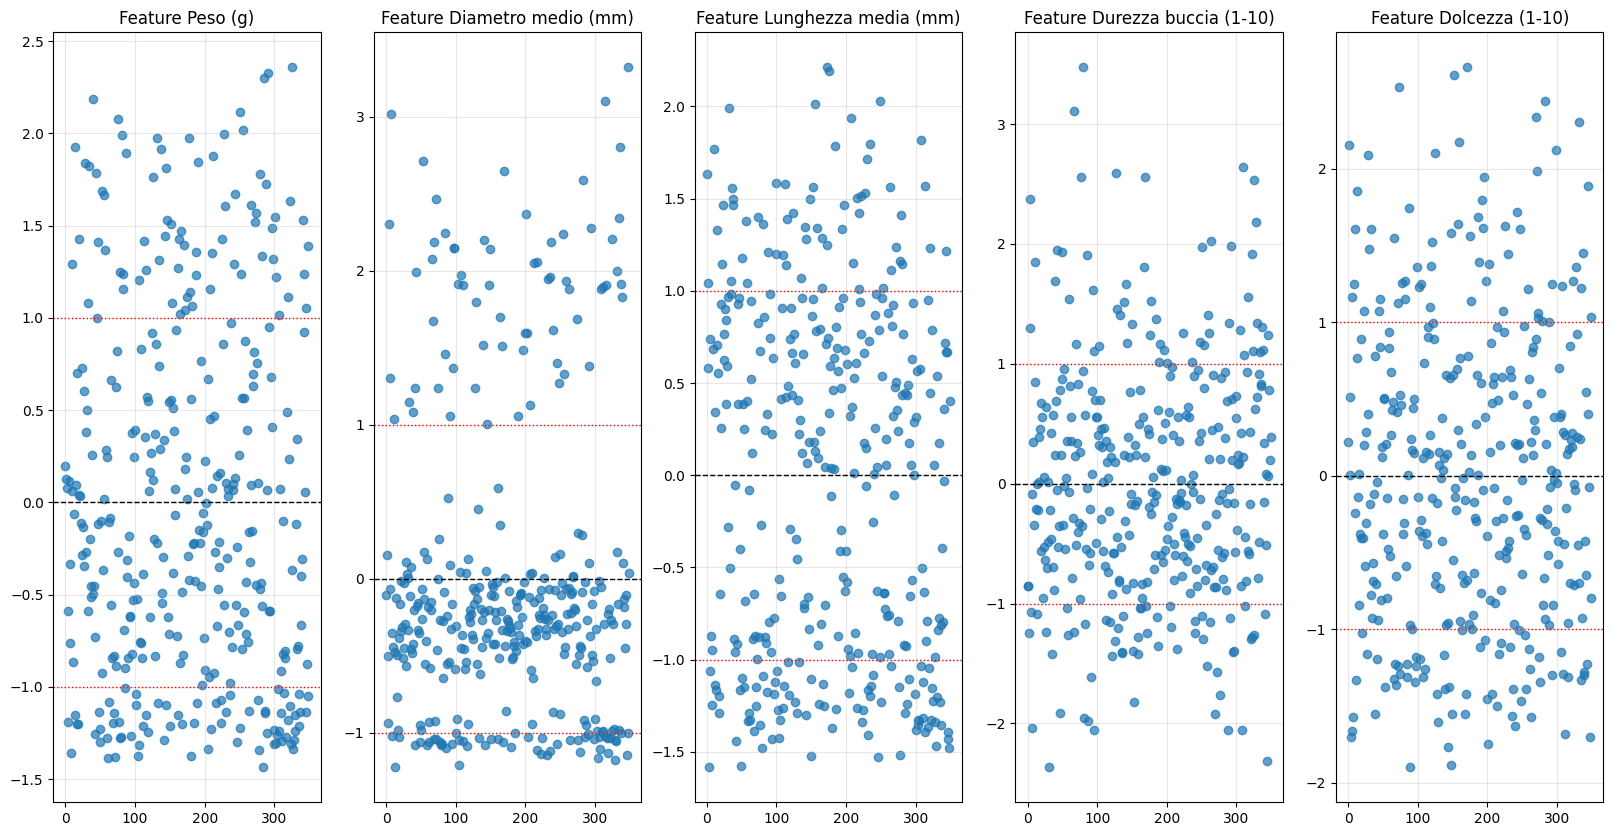

In [9]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
## Trasformo in dataframe per mantenere i nomi delle colonne
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
## Visualizzazione delle feature dopo la standardizzazione
n_features = 5
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes = axes.ravel()

for i, feature_name in enumerate(feature_names):
    data = X_train_scaled[feature_name]
    ax = axes[i]
    ax.scatter(np.arange(len(data)), data, alpha=0.7)

    mean = np.mean(data)
    std = np.std(data)

    ax.axhline(mean, color="black", linestyle="--", linewidth=1, label="mean")
    ax.axhline(mean + std, color="red", linestyle=":", linewidth=1, label="+1 std")
    ax.axhline(mean - std, color="red", linestyle=":", linewidth=1, label="-1 std")
    ax.set_title(f"Feature {feature_name}")
    ax.grid(True, alpha=0.3)

### Implementazione del modello K-NN richiesto

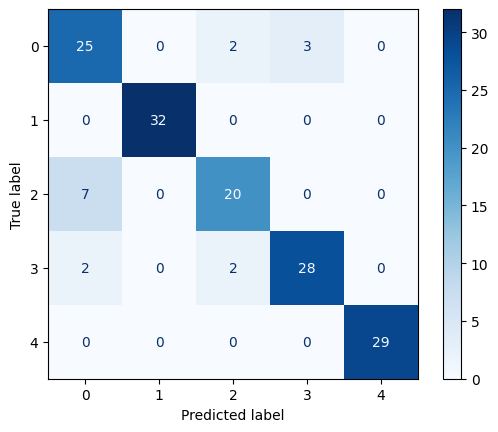

              precision    recall  f1-score   support

     Arancia       0.74      0.83      0.78        30
      Banana       1.00      1.00      1.00        32
        Kiwi       0.83      0.74      0.78        27
        Mela       0.90      0.88      0.89        32
         Uva       1.00      1.00      1.00        29

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

Accuracy: 0.8933


float

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 coincide praticamente con la distanza Euclidea (p=1 distanza di Manhattan)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = evaluate_classification_model(knn, X_test_scaled, y_test, show_confusion_matrix=True)
type(accuracy)

### Facciamo cross-validation

In [11]:
from sklearn.pipeline import Pipeline
# Creiamo uno schema di validazione a 5 fold
cv = StratifiedKFold(n_splits=5, shuffle=True)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

scores = cross_val_score(pipeline, X, y, cv=cv, scoring="accuracy")

print("Accuracy per ogni fold:", scores)
print("Accuracy media:", np.mean(scores))
print("Deviazione standard:", np.std(scores))

Accuracy per ogni fold: [0.89 0.93 0.86 0.94 0.91]
Accuracy media: 0.906
Deviazione standard: 0.02870540018881465


### In questa sezione vado a fare Parameter tuning (su K)

              precision    recall  f1-score   support

     Arancia       0.79      0.87      0.83        30
      Banana       1.00      1.00      1.00        32
        Kiwi       0.92      0.85      0.88        27
        Mela       0.94      0.91      0.92        32
         Uva       1.00      1.00      1.00        29

    accuracy                           0.93       150
   macro avg       0.93      0.92      0.93       150
weighted avg       0.93      0.93      0.93       150

Accuracy: 0.9267
              precision    recall  f1-score   support

     Arancia       0.67      0.87      0.75        30
      Banana       1.00      1.00      1.00        32
        Kiwi       0.80      0.74      0.77        27
        Mela       0.92      0.72      0.81        32
         Uva       1.00      1.00      1.00        29

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

Accur

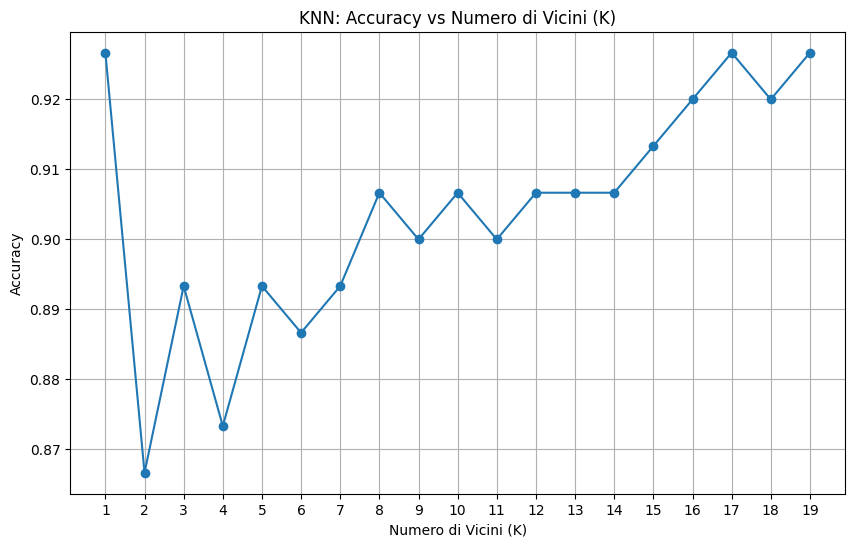

In [12]:
accuracy_scores = []
n_max = 20
for k in range(1, n_max):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # p=2 coincide praticamente con la distanza Euclidea (p=1 distanza di Manhattan)
    knn.fit(X_train_scaled, y_train)
    accuracy = evaluate_classification_model(knn, X_test_scaled, y_test, show_confusion_matrix=False)
    accuracy_scores.append(accuracy)

# Visualizziamo l'andamento dell'accuracy in funzione di K
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_max), accuracy_scores, marker='o')
plt.title('KNN: Accuracy vs Numero di Vicini (K)')
plt.xlabel('Numero di Vicini (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, n_max))
plt.grid(True)
plt.show()

### Da questa simulazione si evince che accuracy superiori al 90% si ottengono in maniera **stabile** per valori di vicini alto (range 10-20)